In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz 
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import svm, datasets, linear_model, tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

sns.set(style='whitegrid')
plt.rcParams["figure.figsize"]=(20, 10)
pd.set_option('display.float_format', lambda x: '%f' % x)

### k-NN classifier (k-nearest Neighbors)

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

The KNN Algorithm
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data:
- Calculate the distance between the query example and the current example from the data.
- Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels

In [2]:
df = datasets.load_iris()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=.2, random_state=0)

In [4]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [5]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 30 points : 0


In [6]:
def plot_con_matrix(class_names, classifier, X_test, y_test):
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(knn, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        disp.ax_.grid(False)

        print(title)
        print(disp.confusion_matrix)

    plt.show()

Confusion matrix, without normalization
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


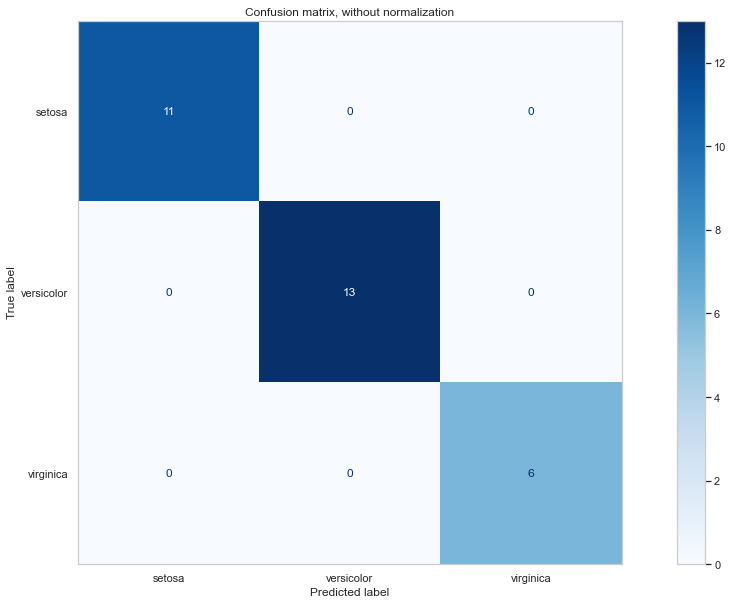

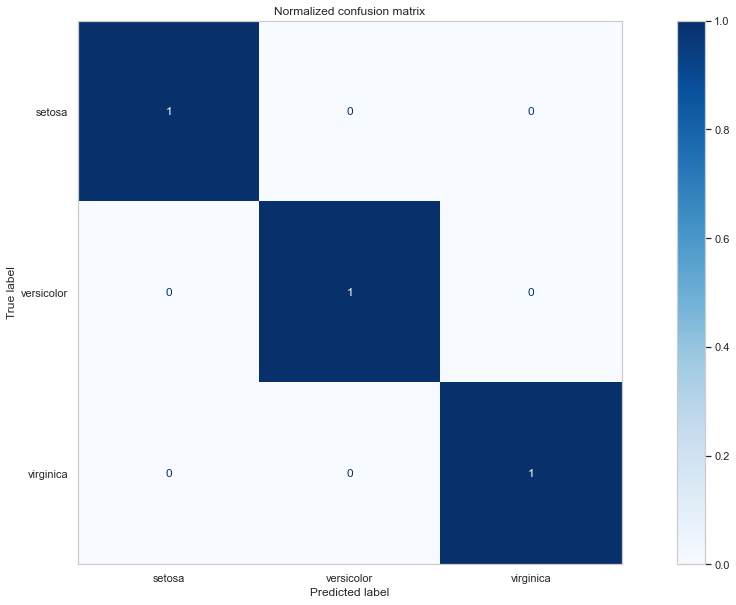

In [7]:
plot_con_matrix(df.target_names, knn, X_test, y_test)

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Accuracy for neighbors from 1 to 25

In [9]:
k_range = range(1, 26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    scores[k] = accuracy_score(y_test, y_pred)
    scores_list.append(accuracy_score(y_test, y_pred))

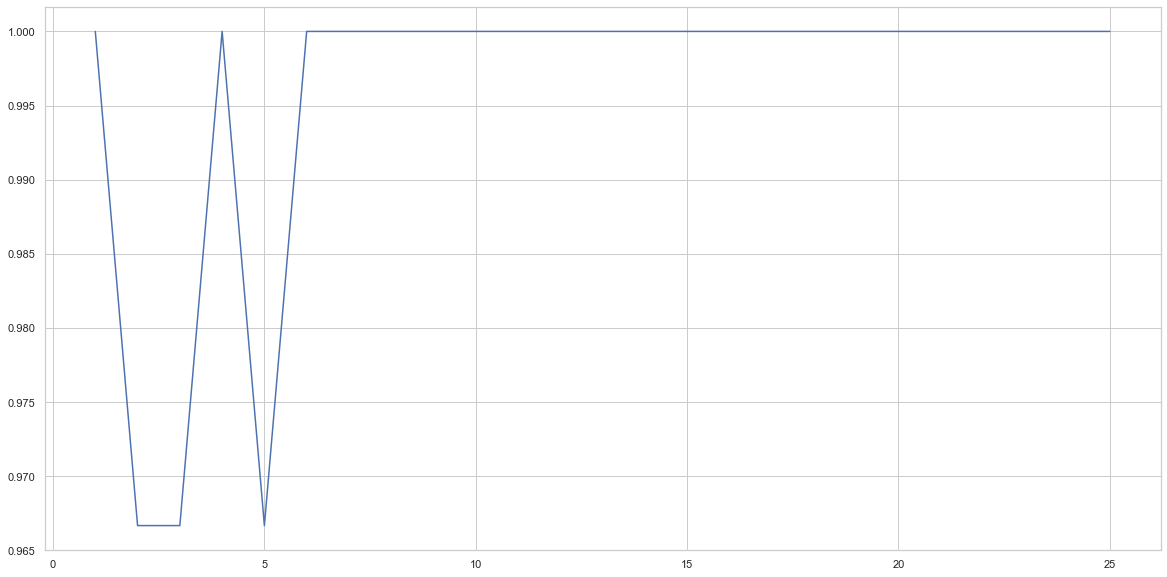

In [10]:
plt.plot(k_range, scores_list)
plt.show()

### Decision tree

A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels.

#### Rain forecast tree

![Rain forecast tree](https://miro.medium.com/max/2400/0*PB7MYQfzyaLaTp1n)

In [11]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(558.0, 498.3, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(472.15384615384613, 407.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(643.8461538461538, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(343.38461538461536, 317.1, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(171.69230769230768, 226.5, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(85.84615384615384, 135.89999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(257.53846153846155, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(515.0769230769231, 226.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(429.23076923076917, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(600.9230769230769, 135.89999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(515.0769230769231, 45.2

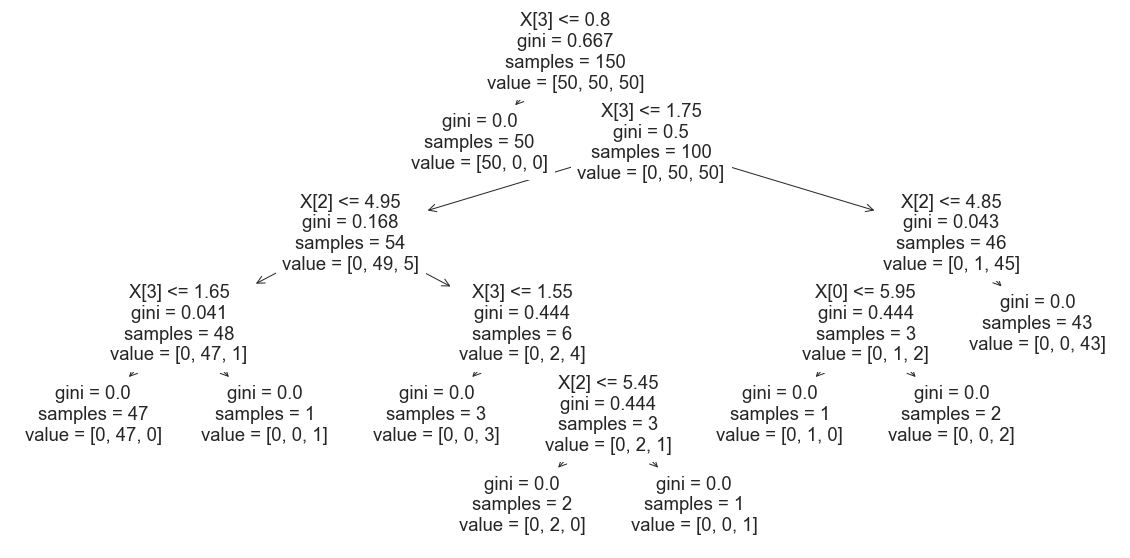

In [12]:
tree.plot_tree(clf) 

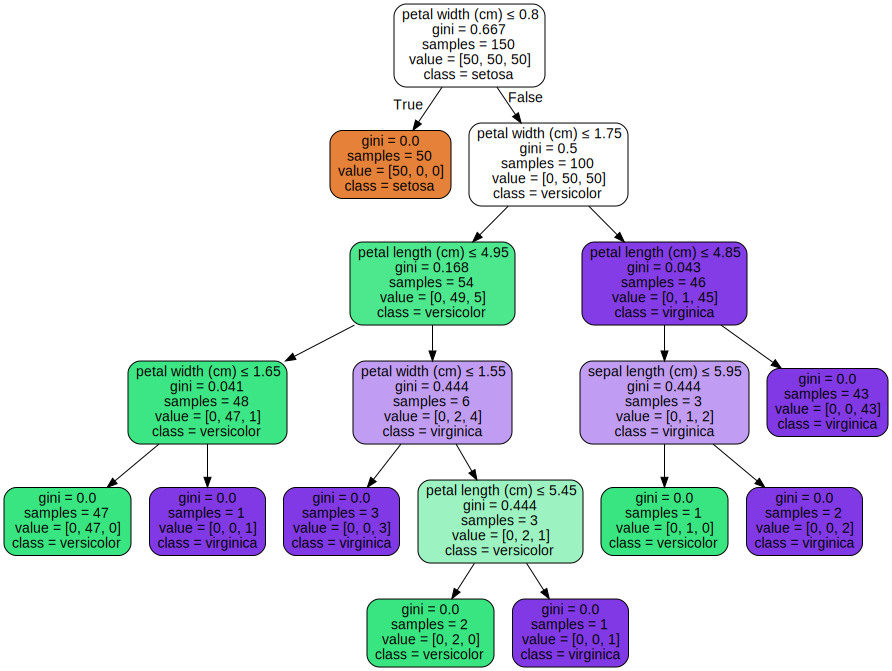

In [13]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Logistic regression

Logistic regression is a classification algorithm. It is used to predict a binary outcome based on a set of independent variables.

In [14]:
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

logreg.predict_proba(X_train[:2, :])

logreg.score(X_train, y_train)

0.9733333333333334

In [15]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 5


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      0.97      0.92        30
           2       0.95      0.83      0.89        24

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.94      0.93      0.93        75



Confusion matrix, without normalization
[[21  0  0]
 [ 0 27  3]
 [ 0  1 23]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.9        0.1       ]
 [0.         0.04166667 0.95833333]]


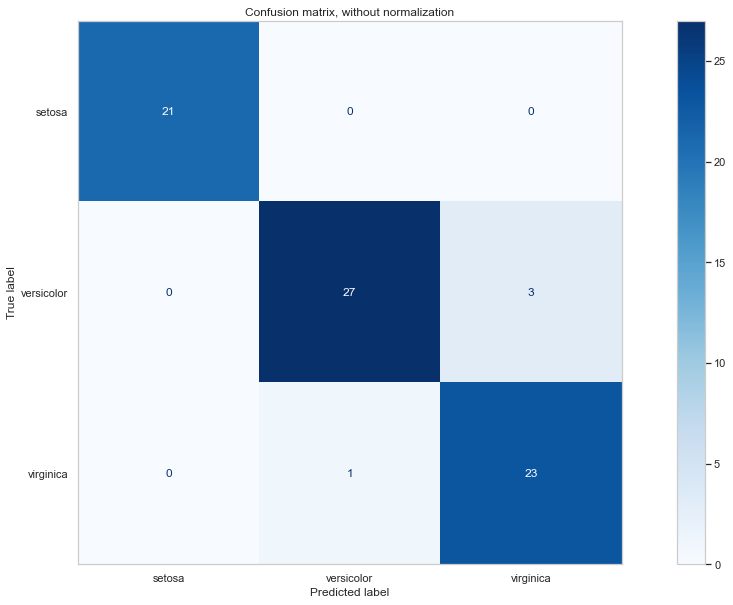

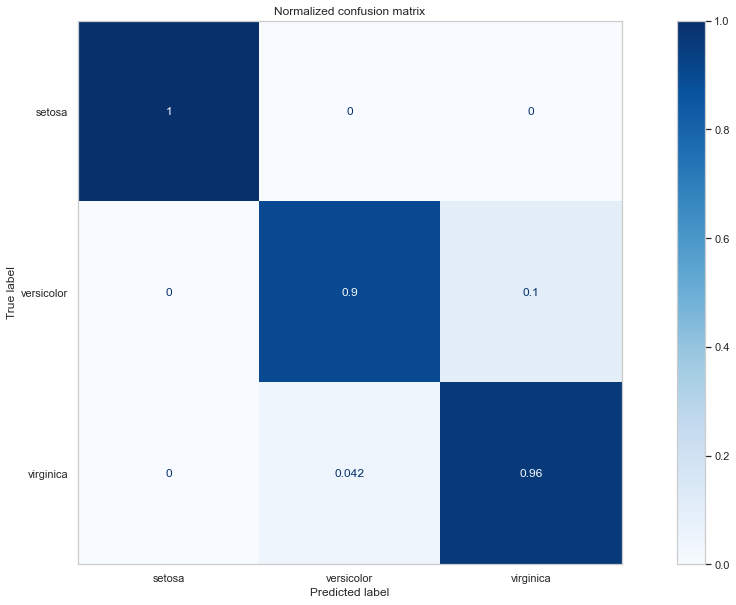

In [17]:
plot_con_matrix(df.target_names, logreg, X_test, y_test)

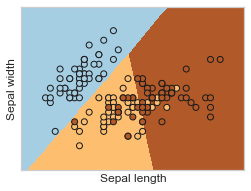

In [18]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Naive Bayes

In [19]:
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      1.00      0.94        30
           2       1.00      0.83      0.91        24

    accuracy                           0.95        75
   macro avg       0.96      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75



Confusion matrix, without normalization
[[21  0  0]
 [ 0 27  3]
 [ 0  1 23]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.9        0.1       ]
 [0.         0.04166667 0.95833333]]


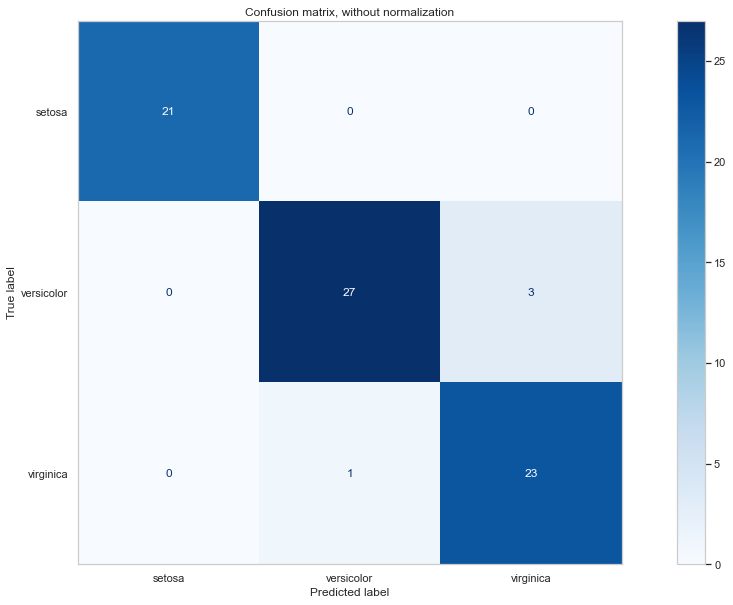

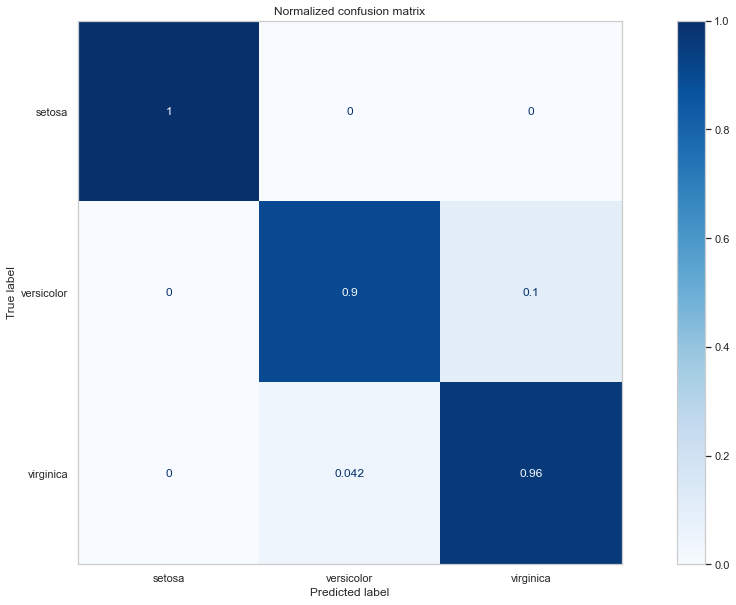

In [21]:
plot_con_matrix(df.target_names, gnb, X_test, y_test)

### Linear Discriminant Analysis

In [22]:
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 3


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.97      0.95        30
           2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



Confusion matrix, without normalization
[[21  0  0]
 [ 0 27  3]
 [ 0  1 23]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.9        0.1       ]
 [0.         0.04166667 0.95833333]]


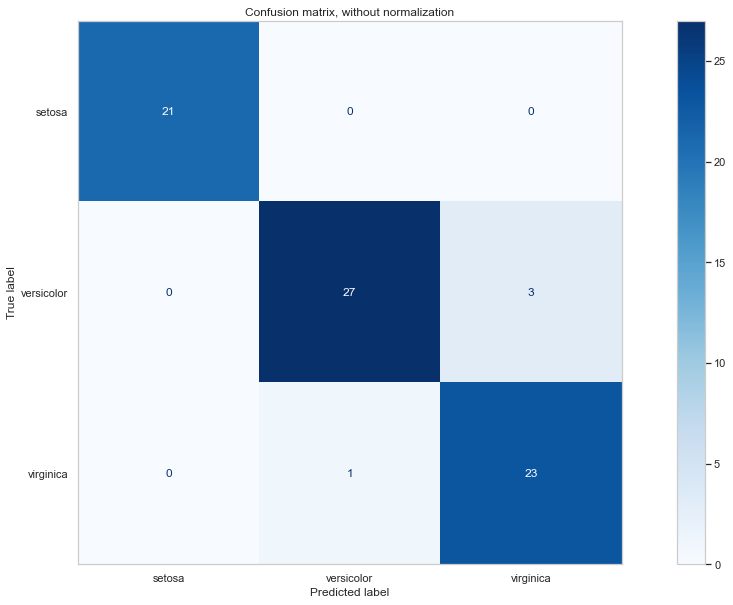

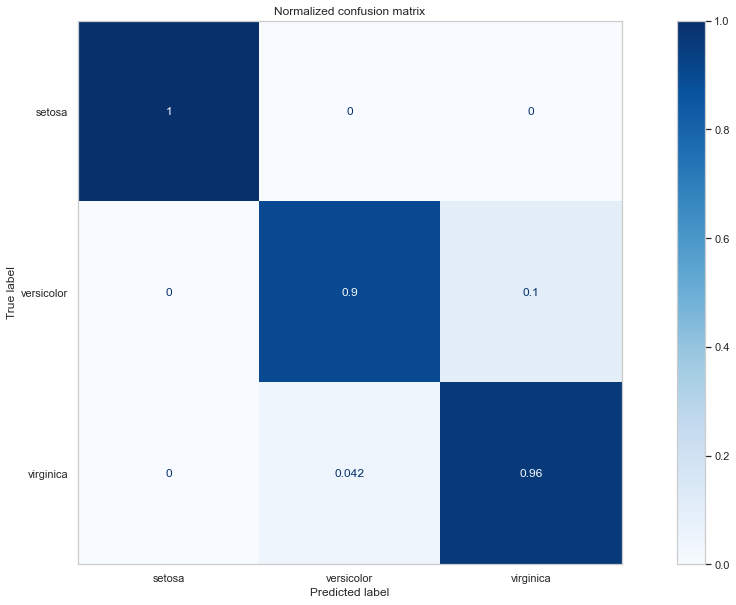

In [24]:
plot_con_matrix(df.target_names, gnb, X_test, y_test)

### Support Vector Machine

In [25]:
df = datasets.load_iris()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=.5, random_state=0)

In [27]:
random_state = np.random.RandomState(0)

svmC = svm.SVC(kernel='linear', probability=True, random_state=random_state)

y_pred = svmC.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 2


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.97      0.97      0.97        30
           2       0.96      0.96      0.96        24

    accuracy                           0.97        75
   macro avg       0.98      0.98      0.98        75
weighted avg       0.97      0.97      0.97        75



Confusion matrix, without normalization
[[21  0  0]
 [ 0 27  3]
 [ 0  1 23]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.9        0.1       ]
 [0.         0.04166667 0.95833333]]


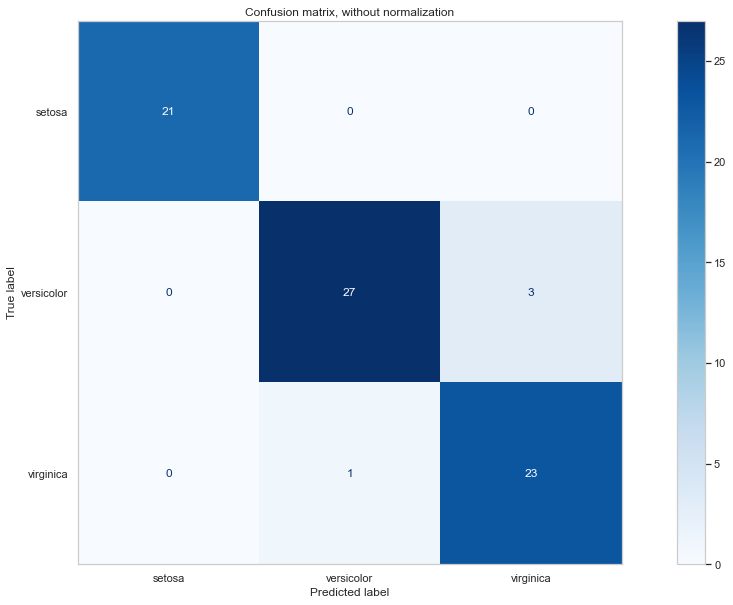

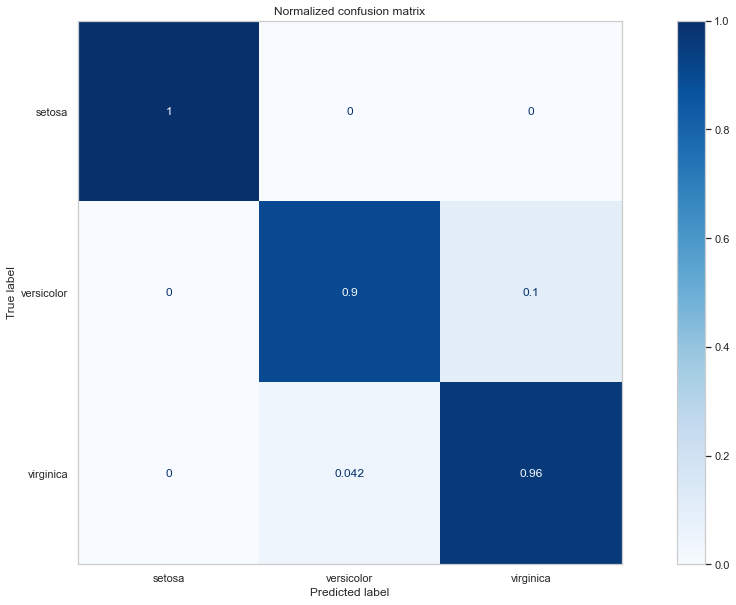

In [29]:
plot_con_matrix(df.target_names, svmC, X_test, y_test)

### Multi Layer Perceptron

In [30]:
df = datasets.load_iris()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=.5, random_state=0)

In [32]:
mlp = MLPClassifier(random_state=1, max_iter=1500).fit(X_train, y_train)
mlp.predict_proba(X_test[:1])

mlp.predict(X_test[:5, :])

mlp.score(X_test, y_test)

0.9733333333333334

In [33]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 2


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.97      0.97      0.97        30
           2       0.96      0.96      0.96        24

    accuracy                           0.97        75
   macro avg       0.98      0.98      0.98        75
weighted avg       0.97      0.97      0.97        75



Confusion matrix, without normalization
[[21  0  0]
 [ 0 27  3]
 [ 0  1 23]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.9        0.1       ]
 [0.         0.04166667 0.95833333]]


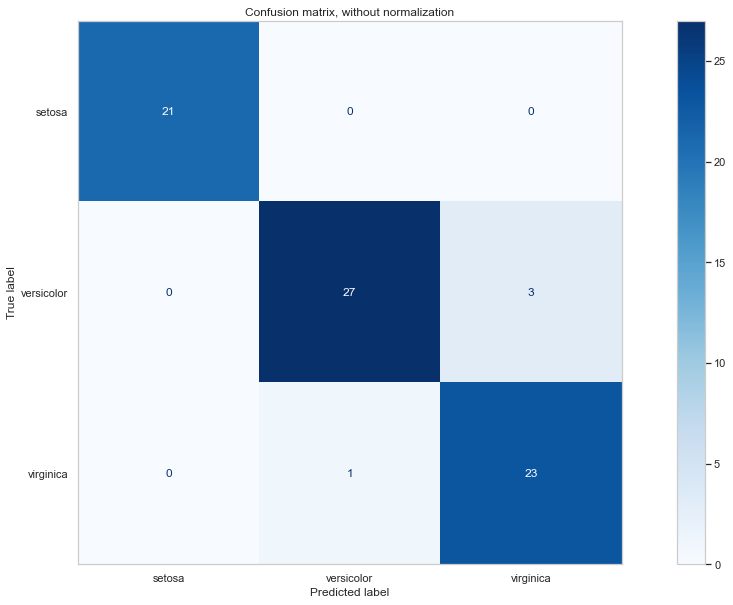

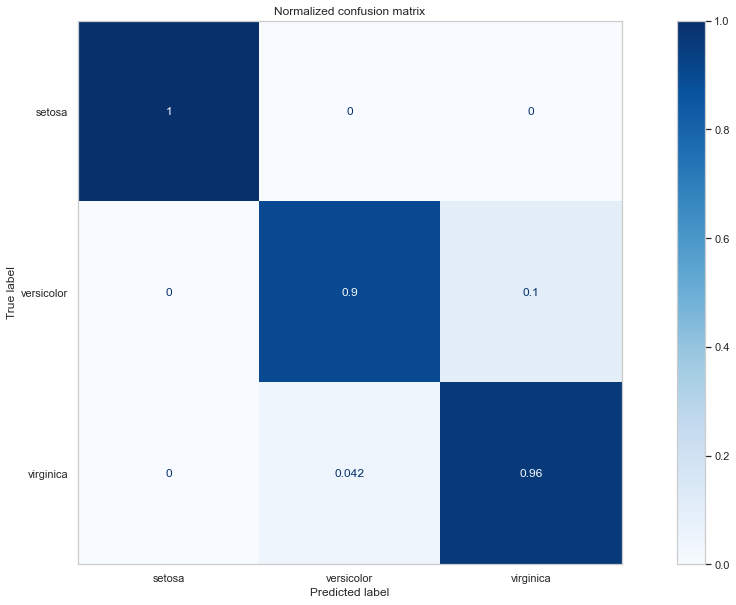

In [35]:
plot_con_matrix(df.target_names, mlp, X_test, y_test)